In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
from math import * 

os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
if path_parent.endswith("Abaqus-Macromechanics-Project"):
    os.chdir(path_parent) 
    print("Moving up to the parent directory")
    print(os.getcwd())

from modules.IO import *
from modules.calculation import *
from optimizers.optimize import *

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project\notebooks
Moving up to the parent directory
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project


### Choose the target curve 

In [7]:
# # DP1000 25C
# path = "DP1000_25C_SwiftVoce_curve1"
# geometries = ["NDBR50","NDBR20","NDBR6","CHD6","SH"]
# yieldingIndices = {"NDBR50": 700, "NDBR20": 800,"NDBR6": 800, "CHD6": 800, "SH": 500}
# ymax = 22000
# xmax = 2.1

# # DP1000 400C
# path = "DP1000_400C_SwiftVoce_curve1" 
# geometries = ["NDBR50","NDBR6","CHD6"]
# yieldingIndices = {"NDBR50": 200, "NDBR6": 200,"CHD6": 1200}
# ymax = 22000
# xmax = 2.1

# QP1000 25C
path = "QP1000_25C_SwiftVoce_curve1"
geometries = ["NDBR25","NDBR6","CHD6"]
yieldingIndices = {"NDBR25": 220, "NDBR6": 260,"CHD6": 280}
ymax = 12000
xmax = 2.5

# Plot all target curves
colors = {"NDBR50": "navy", "NDBR25": "darkgreen" , "NDBR20": "limegreen", "NDBR6": "gold" ,"CHD6": "purple", "SH": "red"}

targetCurves = {}
for geometry in geometries:
    targetPath = f"MOO_targets/{path}/{geometry}/FD_Curve.csv"
    targetCurve = pd.read_csv(targetPath)
    targetCurves[geometry] = targetCurve

simCurves = {}
for geometry in geometries:
    simPath = f"notebooks/simcurves_for_targetplots/{path}/{geometry}/FD_Curve.txt"
    displacement, force = read_FD_Curve(simPath)
    simCurve = pd.DataFrame({"displacement/mm": displacement, "force/N": force})
    simCurves[geometry] = simCurve

In [4]:
# Add column force,N to the target curve
# Create new dataframe

# df = pd.DataFrame(columns=['displacement/mm', 'force/kN', 'force/N'])
# targetCurve = pd.read_csv(f"{targetPathCurve}")
# df['displacement/mm'] = targetCurve['displacement/mm']
# df['force/kN'] = targetCurve['force/kN'] 
# df['force/N'] = targetCurve['force/kN'] * 1e3
# df.to_csv(f"{targetPathCurve}",index=False)

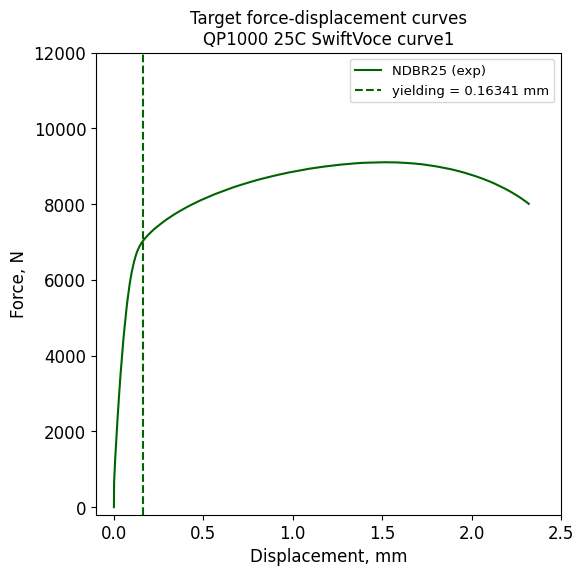

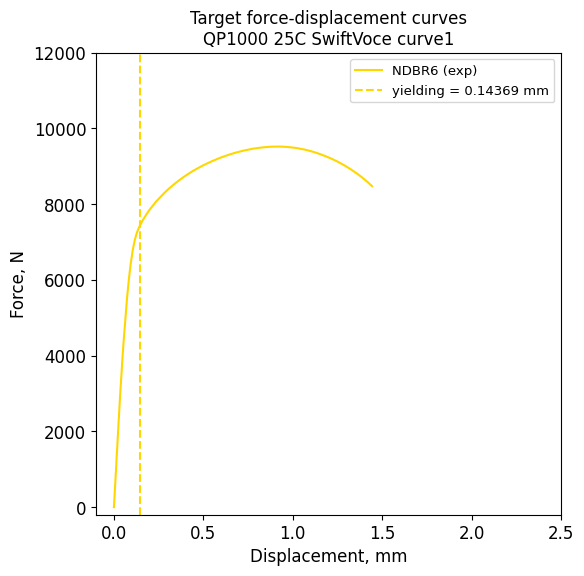

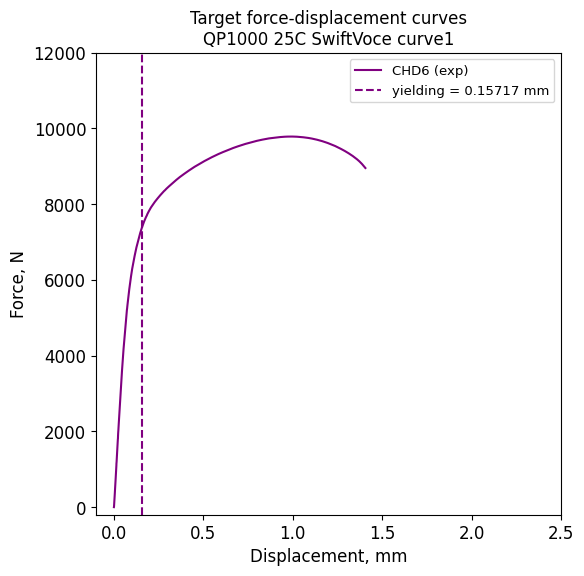

In [8]:
# Plot all target curves

for geometry in geometries:
    fontsize=12
    plt.figure(figsize=(6,6))
    targetCurve = targetCurves[geometry]
    simCurve = simCurves[geometry]
    plt.plot(targetCurve['displacement/mm'], targetCurve['force/N'], color=colors[geometry], label=f"{geometry} (exp)")
    # plt.plot(simCurve['displacement/mm'], simCurve['force/N'], color=colors[geometry], linestyle='--', label=f"{geometry} (sim)")
    yieldPoint = round(targetCurve['displacement/mm'][yieldingIndices[geometry]], 5)
    plt.axvline(x=yieldPoint, color=colors[geometry], linestyle='--', label=f"yielding = {yieldPoint} mm")

    plt.title(f'Target force-displacement curves\n{path.replace("_", " ")}', fontsize=fontsize)
    plt.xlabel('Displacement, mm',fontsize=fontsize)
    plt.ylabel('Force, N', fontsize=fontsize)
    plt.xlim(-0.1, xmax)
    plt.ylim(-200, ymax)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(fontsize=fontsize-2.5)